Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>










<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


In [2]:
#Carregando as bibliotecas

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Carregando o arquivo de dados

data=  pd.read_csv('/datasets/games.csv')

In [4]:
# Imprima informações gerais/resumo sobre o DataFrame dos games
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
# Imprima uma amostra de dados 
print(data.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [6]:
# Renomear as colunas para letras minúsculas
data.columns = data.columns.str.lower()

# Exibir as primeiras linhas para confirmar a mudança
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# Conversão de tipos de dados necessários (Ano para inteiro e score para float)

#CORREÇÃO

# Converter ano de lançamento para inteiro, mantendo NaN
data['year_of_release'] = data['year_of_release'].astype('Int64')

# Converter user_score para float, tratando valores inválidos como NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Remover observações com nomes nulos
data = data.dropna(subset=['name'])

# Criar um mapeamento do ano mais frequente (moda) por jogo, garantindo um único valor
game_year_mode = data.groupby('name')['year_of_release'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Preencher os valores ausentes usando o dicionário
data['year_of_release'] = data['year_of_release'].fillna(data['name'].map(game_year_mode))

# Criar um dicionário com a mediana dos anos de lançamento por plataforma
platform_median_year = data.groupby('platform')['year_of_release'].median()

# Preencher os valores ausentes usando a mediana da plataforma
data['year_of_release'] = data['year_of_release'].fillna(data['platform'].map(platform_median_year))

print(data.head())


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  


year_of_release: possui valores ausentes porque pode haver jogos sem uma data de lançamento registrada.Deixar os valores como estão (NaN) é a melhor opção nesse caso.
critic_score : possui valores ausentes porque podem ser jogos antigos ou que não recebem atenção dos usuarios.Nesse caso, é melhor preencher valores ausentes com a mediana das avaliações, considerando que ela representa uma avaliação central, minimizando o impacto de outliers.
user_score : possui valores ausentes porque podem ser jogos antigos ou que não recebem atenção dos usuarios. Substituir "TBD" (to be determined) por NaN e preencher os valores ausentes com a mediana das pontuações existentes.
rating: Valores ausentes podem ser atribuídos a jogos que não foram classificados. Preencher os valores com "Not Rated", indicando que a classificação não está disponível.
TBD : Substituir "TBD" na coluna user_score por NaN, pois "TBD" não é um valor numérico e indica que a pontuação ainda não foi determinada. Isso evita erros nas análises numericas.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Taina, acredito que podemos melhorar alguns pontos no tratamento do df:
    
- Para o ano de lamnçamento podemos verificar os jogos que possuem o ano preenchido em outra plataforma e para os que persistirem como ausentes usar um valor calculado dentro da respectiva plataforma e não de forma geral (garanta que esse cálculo resulte em um valor inteiro e não decimal)
    
- Para as avaliações, como vamos fazer análises de correlação dessas variáveis com as métricas, a substituição pode gerar viéses na interpretação. Sugiro que os mantenha como ausentes
    
- Para as observações com os nomes nulos podemos exluí-las da análise já que não sabemos do que se tratam
    
- Estou de acordo com as demais decisões.
    
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste! Tudo está certinho agora.
</div>


In [8]:
# Substituir "TBD" na coluna user_score por NaN
data['user_score'] = data['user_score'].replace('TBD', pd.NA)

# Preencher valores ausentes na coluna critic_score com a mediana
critic_score_median = data['critic_score'].median()
data['critic_score'] = data['critic_score'].fillna(critic_score_median)

# Preencher valores ausentes na coluna user_score com a mediana
user_score_median = data['user_score'].median()
data['user_score'] = data['user_score'].fillna(user_score_median)

# Preencher valores ausentes na coluna rating com "Not Rated"
data['rating'] = data['rating'].fillna("Not Rated")

# Conferindo novamente se há valores ausentes e exibindo as primeiras linhas
missing_values_summary = data.isnull().sum()
missing_values_summary, data.head()

(name               0
 platform           0
 year_of_release    0
 genre              0
 na_sales           0
 eu_sales           0
 jp_sales           0
 other_sales        0
 critic_score       0
 user_score         0
 rating             0
 dtype: int64,
                        name platform  year_of_release         genre  na_sales  \
 0                Wii Sports      Wii             2006        Sports     41.36   
 1         Super Mario Bros.      NES             1985      Platform     29.08   
 2            Mario Kart Wii      Wii             2008        Racing     15.68   
 3         Wii Sports Resort      Wii             2009        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
 
    eu_sales  jp_sales  other_sales  critic_score  user_score     rating  
 0     28.96      3.77         8.45          76.0         8.0          E  
 1      3.58      6.81         0.77          71.0         7.5  Not Rated  
 2     12.76      3.79  

In [9]:
# Calcular o total de vendas somando as vendas em todas as regiões e exibir o resultado:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Total de vendas calculado.
    
</div>

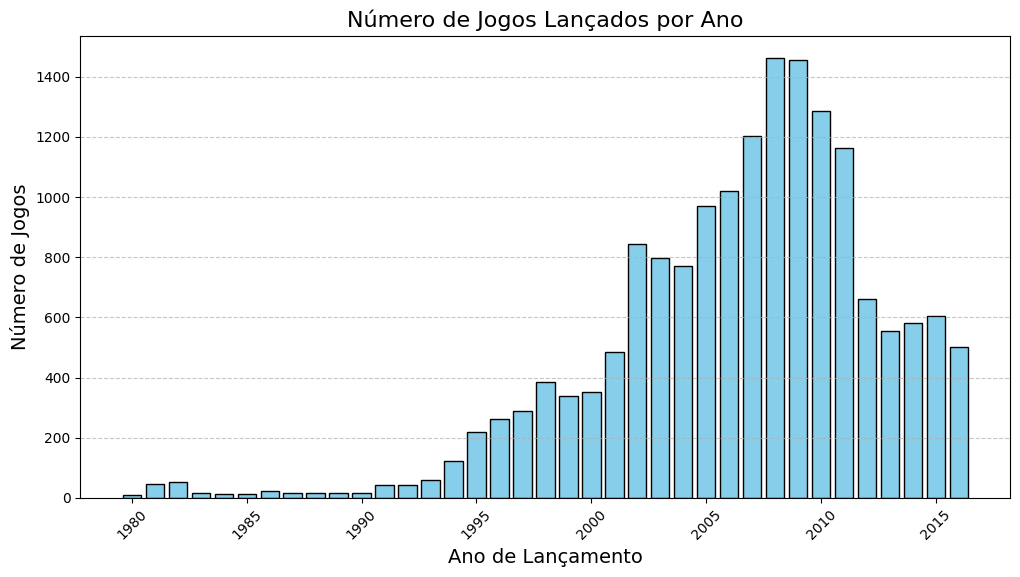

In [10]:
#Analise de dados:
# Contar o número de jogos lançados por ano e criar gráfico para mostrar o número de jogos lançados por ano

games_per_year = data['year_of_release'].value_counts().sort_index() 


plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values, color='skyblue', edgecolor='black')
plt.title("Número de Jogos Lançados por Ano", fontsize=16)
plt.xlabel("Ano de Lançamento", fontsize=14)
plt.ylabel("Número de Jogos", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O gráfico acima mostra o número de jogos lançados por ano. Pode-se observar que:
-Houve um aumento considerável no número de lançamentos a partir dos anos 2000.
-O pico de lançamentos ocorreu entre 2005 e 2010.
-Após 2010, há uma diminuição nos lançamentos.
-Com base nesse padrão, os dados mais significativos parecem estar concentrados entre 2000 e 2016, onde houve maior volume de lançamentos. Isso pode indicar que focar nesse período pode ser mais útil para análises futuras.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Lançamentos anuais investigados!
</div>

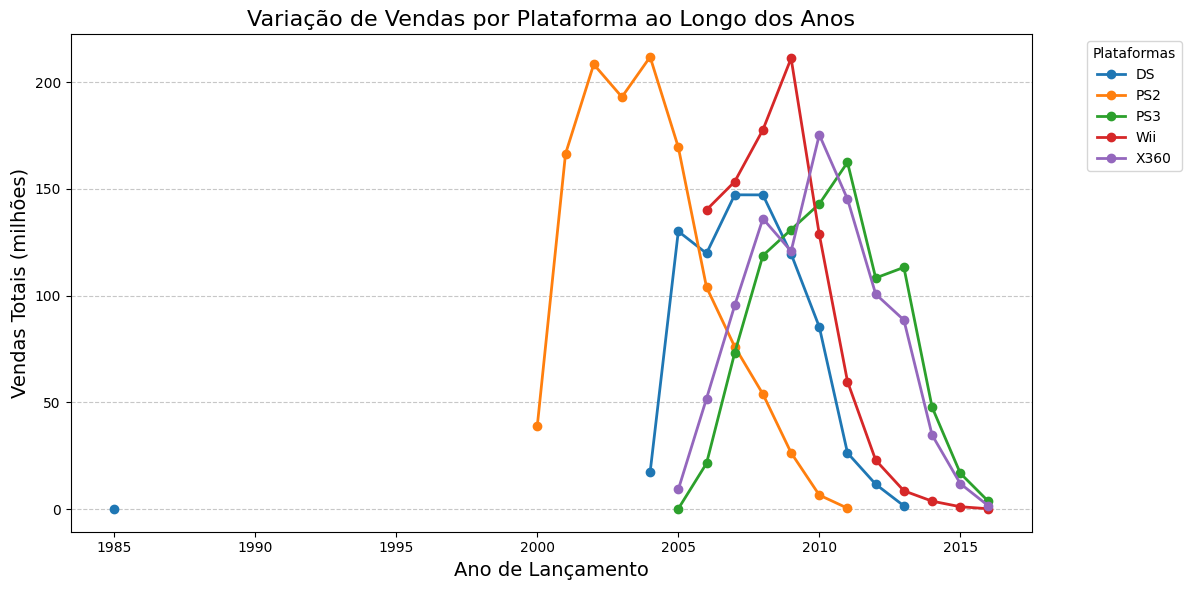

In [11]:
# Analise das vendas por plataforma e verificação das tendências de crescimento ou declínio

# Calcular as vendas totais por plataforma
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Selecionar as plataformas com maiores vendas totais (as 5 principais)
top_platforms = platform_sales.head(5).index

# Filtrar dados para essas plataformas e calcular a distribuição de vendas por ano
top_platforms_data = data[data['platform'].isin(top_platforms)]
sales_per_platform_year = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Criar um gráfico de linha para observar as tendências
plt.figure(figsize=(12, 6))
sales_per_platform_year.plot(ax=plt.gca(), marker='o', linewidth=2)
plt.title("Variação de Vendas por Plataforma ao Longo dos Anos", fontsize=16)
plt.xlabel("Ano de Lançamento", fontsize=14)
plt.ylabel("Vendas Totais (milhões)", fontsize=14)
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O gráfico acima mostra como as vendas variaram ao longo dos anos para as 5 plataformas com as maiores vendas.
Observações iniciais:
Algumas plataformas, como o Wii, tiveram um crescimento explosivo, mas suas vendas diminuíram rapidamente após o pico.
Outras, como o PS2 e o PS3, apresentaram vendas mais constantes, mas também declinaram com o tempo.
Plataformas populares têm cerca de 7 a 10 anos de relevância antes de serem substituídas.
Com base nessas informações, o período relevante para as análises futuras (2000 a 2016) parece ideal. Dessa forma, exclui-se os anos muito antigos ou recentes com dados escassos. 


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Lançamentos por plataforma e definição de período de análise realizados de forma coerente
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Algumas sessões ficaram pendentes por aqui:
    
    Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.
    
    Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.
    
    Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.
    
    Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
    
    Com essas conclusões em mente, compare as vendas em outras plataformas.
    
    Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito.
    
Boxplot plotado e analisado.    

Perfil com as correlações foi fornecido.
    

    
    
</div>


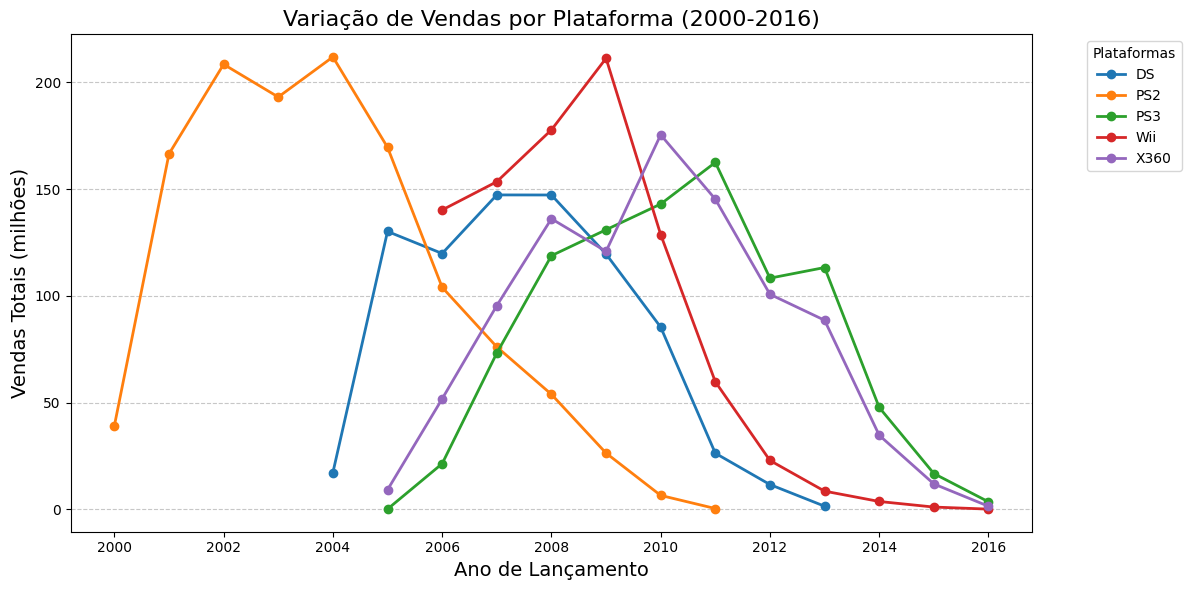

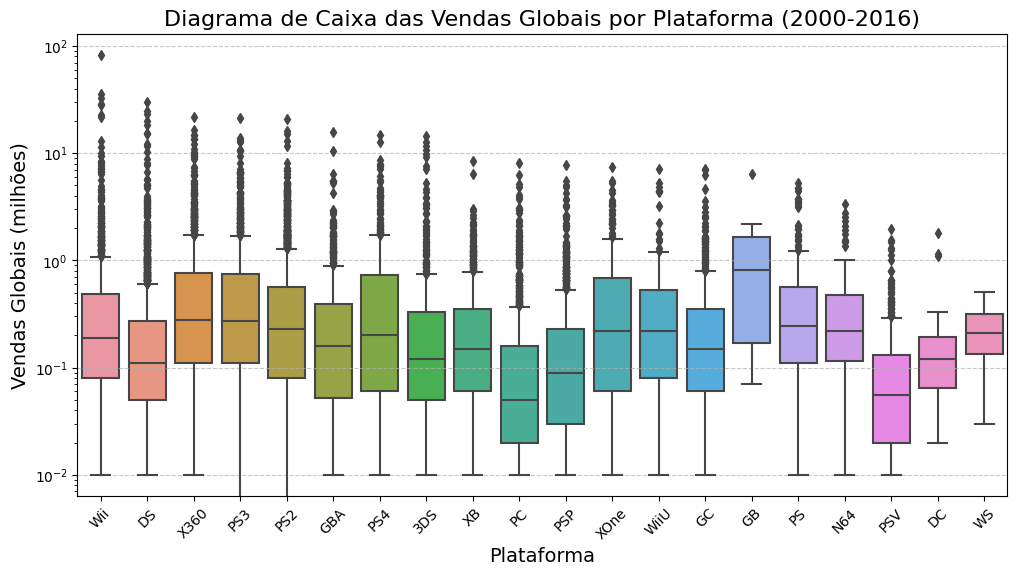

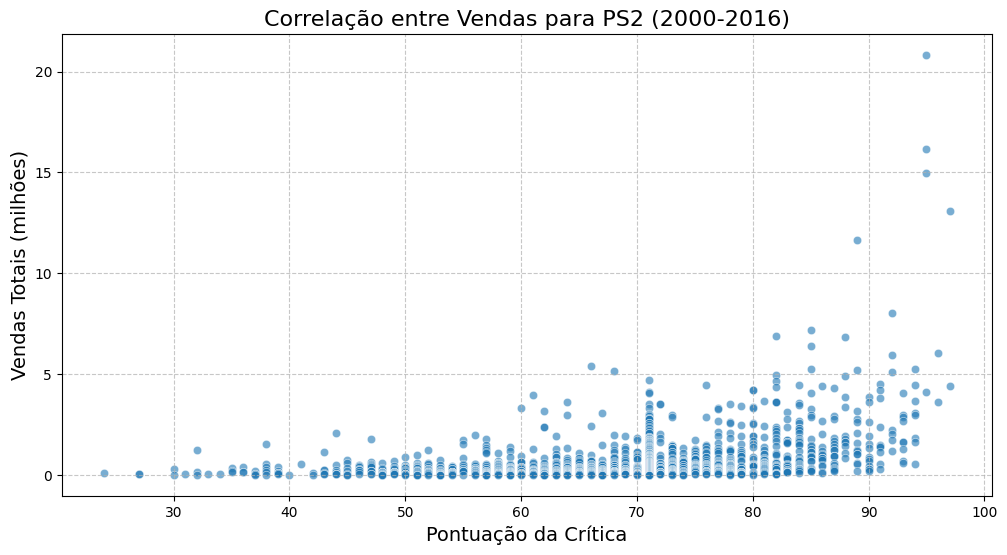

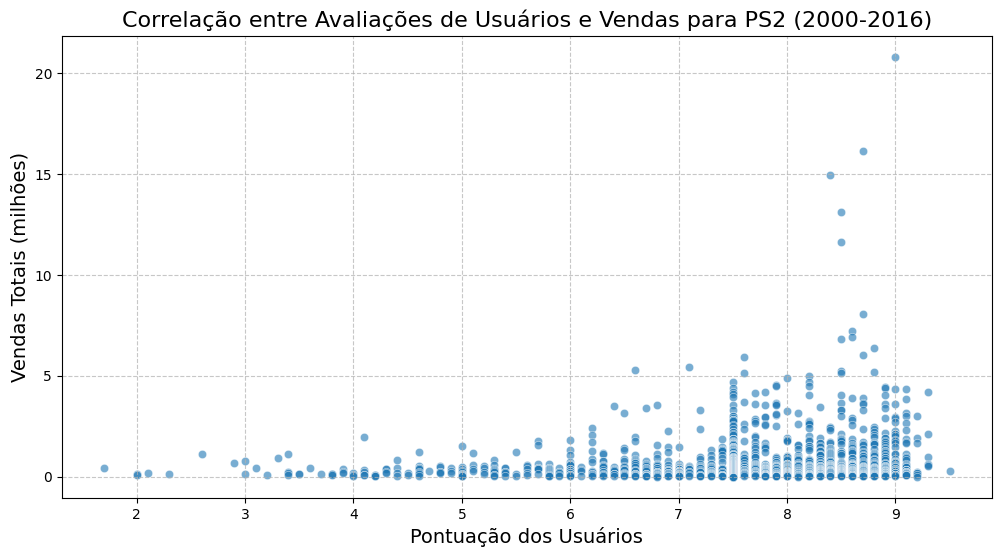

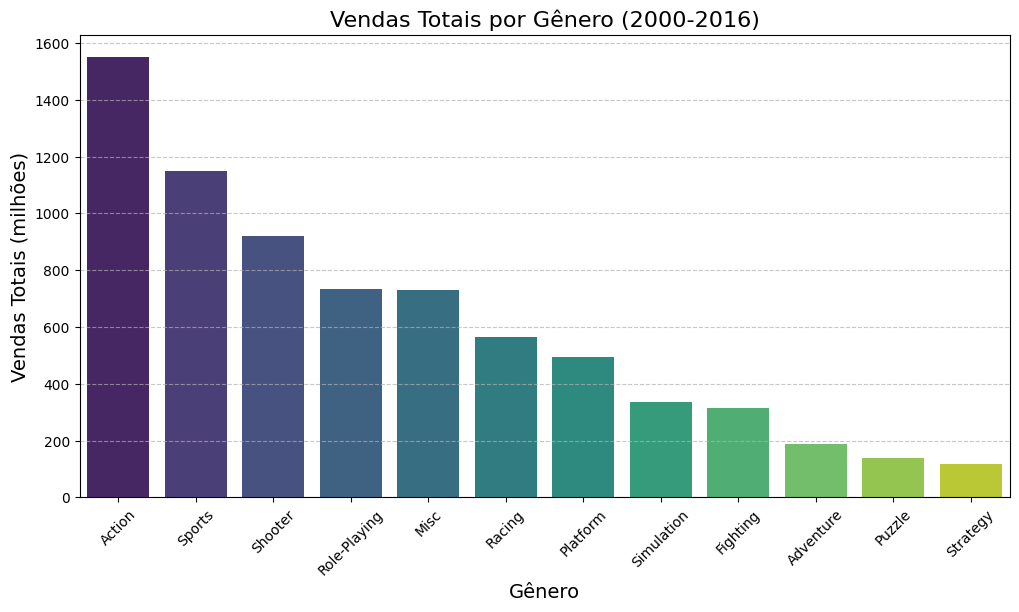

(0.3454765724600367, 0.1748565837500119)

In [12]:
#Implementando as sessões pendentes:
#Considerando o periodo relevante de 2000 a 2016 para as analises:

data_filtered = data[(data['year_of_release'] >= 2000) & (data['year_of_release'] <= 2016)]

# Calcular as vendas totais por plataforma de 2000 a 2016
platform_sales_filtered = data_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Selecionar as plataformas com maiores vendas totais (as 5 principais) de 2000 a 2016
top_platforms_filtered = platform_sales_filtered.head(5).index

# Filtrar dados para essas plataformas e calcular a distribuição de vendas por ano de 2000 a 2016
top_platforms_data_filtered = data_filtered[data_filtered['platform'].isin(top_platforms_filtered)]
sales_per_platform_year_filtered = top_platforms_data_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Criar um gráfico de linha para observar as tendências de vendas por plataforma de 2000 a 2016
plt.figure(figsize=(12, 6))
sales_per_platform_year_filtered.plot(ax=plt.gca(), marker='o', linewidth=2)
plt.title("Variação de Vendas por Plataforma (2000-2016)", fontsize=16)
plt.xlabel("Ano de Lançamento", fontsize=14)
plt.ylabel("Vendas Totais (milhões)", fontsize=14)
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Criar um diagrama de caixa para as vendas globais de todos os jogos por plataforma de 2000 a 2016
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=data_filtered)
plt.title("Diagrama de Caixa das Vendas Globais por Plataforma (2000-2016)", fontsize=16)
plt.xlabel("Plataforma", fontsize=14)
plt.ylabel("Vendas Globais (milhões)", fontsize=14)
plt.xticks(rotation=45)
plt.yscale("log")  # Escala logarítmica para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pegando a plataforma mais vendida para o calculo da correlação de 2000 a 2016
popular_platform = top_platforms_filtered[0]  
platform_data = data_filtered[data_filtered['platform'] == popular_platform]

# Criar gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(x=platform_data['critic_score'], y=platform_data['total_sales'], alpha=0.6)
plt.title(f"Correlação entre Vendas para {popular_platform} (2000-2016)", fontsize=16)
plt.xlabel("Pontuação da Crítica", fontsize=14)
plt.ylabel("Vendas Totais (milhões)", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Calcular a correlação entre avaliações e vendas
correlation_critic = platform_data[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Criar gráfico de dispersão entre avaliações dos usuários e vendas
plt.figure(figsize=(12, 6))
sns.scatterplot(x=platform_data['user_score'], y=platform_data['total_sales'], alpha=0.6)
plt.title(f"Correlação entre Avaliações de Usuários e Vendas para {popular_platform} (2000-2016)", fontsize=16)
plt.xlabel("Pontuação dos Usuários", fontsize=14)
plt.ylabel("Vendas Totais (milhões)", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Calcular a correlação entre avaliações dos usuários e vendas
correlation_user = platform_data[['user_score', 'total_sales']].corr().iloc[0, 1]

# Distribuição geral de jogos por gênero
genre_sales = data_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Criar um gráfico de barras para visualizar os gêneros mais lucrativos
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title("Vendas Totais por Gênero (2000-2016)", fontsize=16)
plt.xlabel("Gênero", fontsize=14)
plt.ylabel("Vendas Totais (milhões)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Exibir correlações calculadas
correlation_critic, correlation_user


Conclusões sobre o Periodo de 2000 a 2016:

Identifiquei as plataformas líderes em vendas (D5, PS2, PS3, W6 e X360). 
Algumas plataformas mostram picos de vendas seguidos por quedas, indicando ciclos de vida claros.
O diagrama de caixa das vendas globais por plataforma exibe a variação nas vendas de jogos por plataforma.
As plataformas com uma grande dispersão de vendas, indicam que alguns jogos foram extremamente bem-sucedido em vendas.
A correlação entre críticas profissionais e vendas foi 0.345,já a correlação entre avaliações dos usuários e vendas foi 0.175. 
Isso mostra que as críticas profissionais influenciam mais as vendas do que as avaliações dos jogadores.
Os gêneros mais lucrativos são Ação, Esporte e Tiro. Já os gêneros de Aventura, quebra cabeça e estrategia vendem bem menos e são os 3 com menor número de vendas.

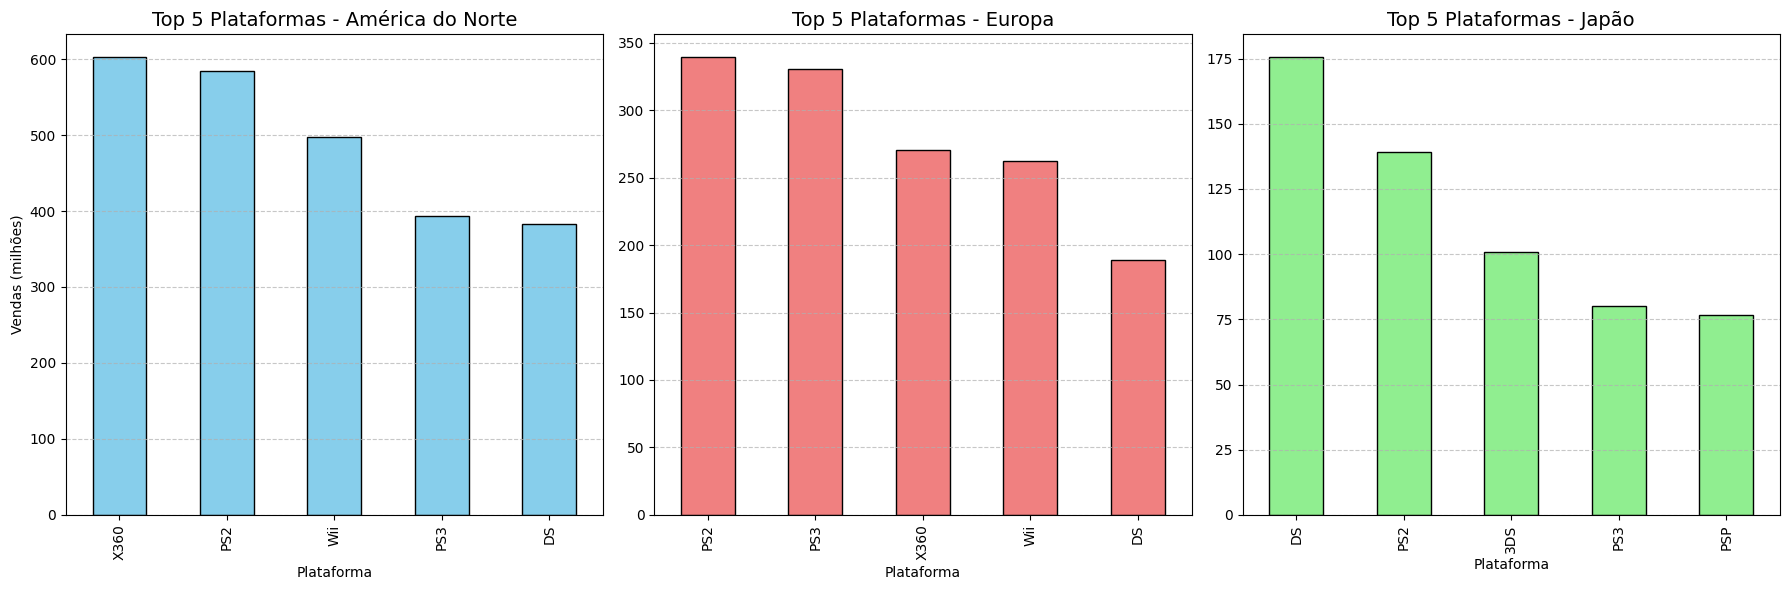

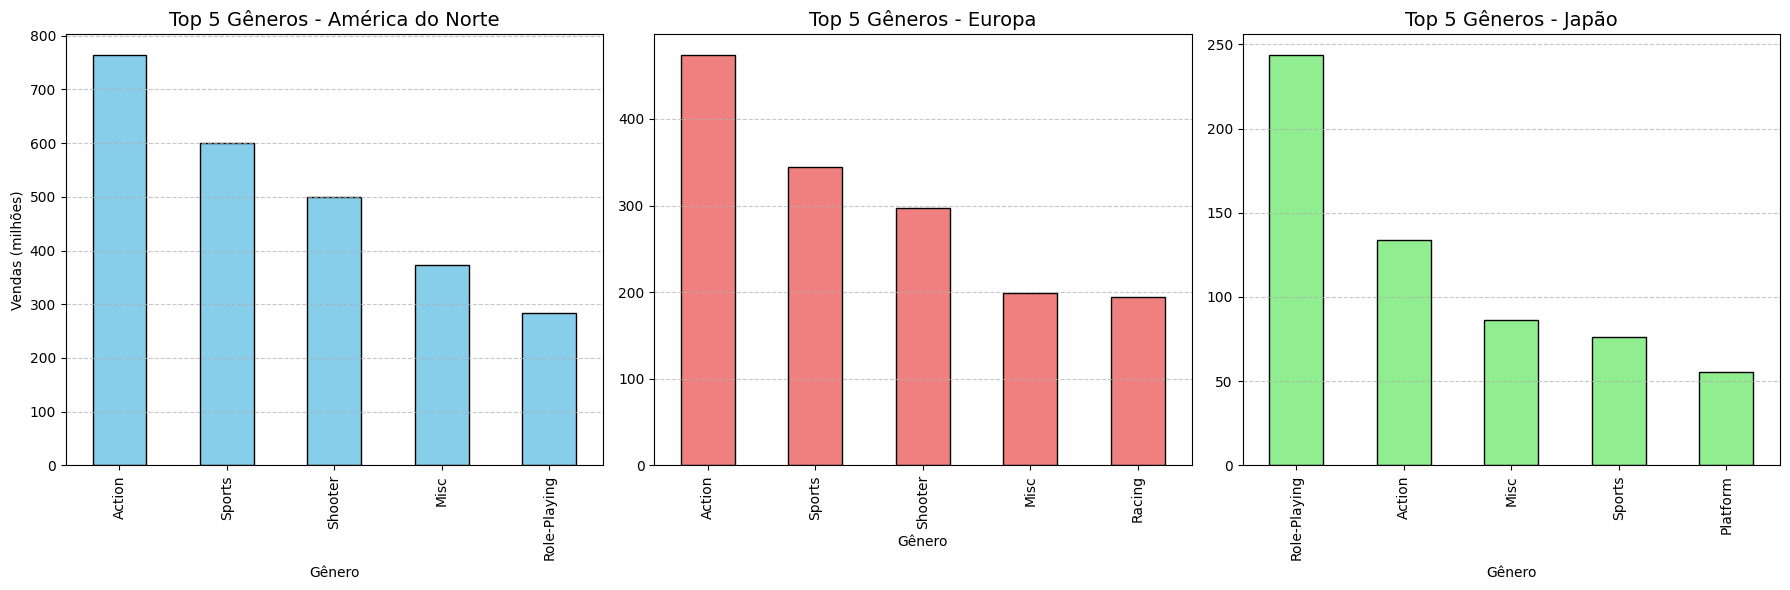

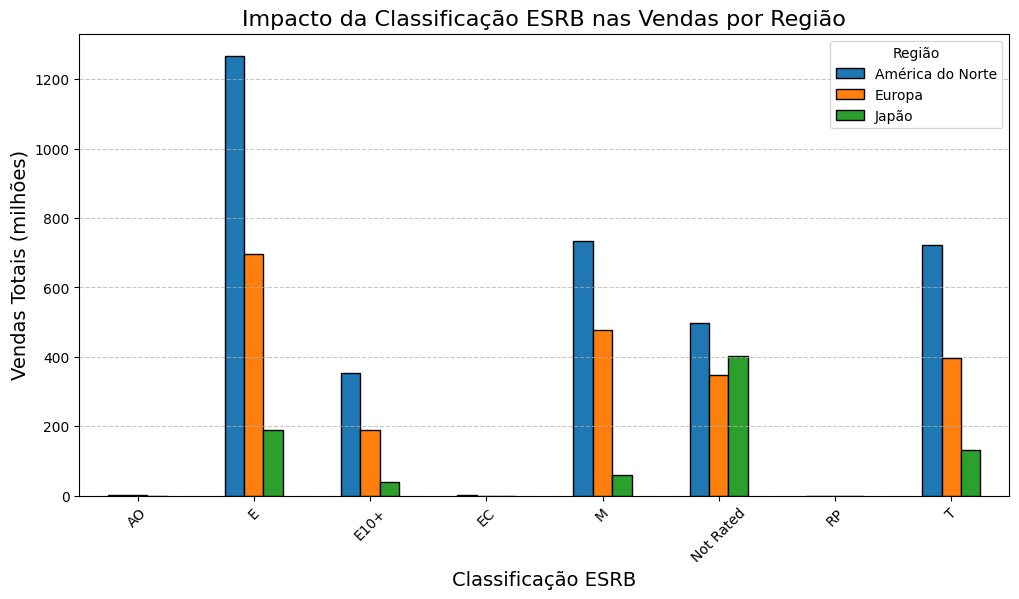

In [16]:
# Analisar as 5 principais plataformas por região
top_na_platforms = data_filtered.groupby('platform')['na_sales'].sum().nlargest(5)
top_eu_platforms = data_filtered.groupby('platform')['eu_sales'].sum().nlargest(5)
top_jp_platforms = data_filtered.groupby('platform')['jp_sales'].sum().nlargest(5)

# Criar gráficos para visualizar as plataformas mais vendidas em cada região
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

top_na_platforms.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title("Top 5 Plataformas - América do Norte", fontsize=14)
axes[0].set_ylabel("Vendas (milhões)")
axes[0].set_xlabel("Plataforma")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

top_eu_platforms.plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title("Top 5 Plataformas - Europa", fontsize=14)
axes[1].set_xlabel("Plataforma")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

top_jp_platforms.plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title("Top 5 Plataformas - Japão", fontsize=14)
axes[2].set_xlabel("Plataforma")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Análise dos 5 principais gêneros por região
top_na_genres = data_filtered.groupby('genre')['na_sales'].sum().nlargest(5)
top_eu_genres = data_filtered.groupby('genre')['eu_sales'].sum().nlargest(5)
top_jp_genres = data_filtered.groupby('genre')['jp_sales'].sum().nlargest(5)

# Criar gráficos para visualizar os gêneros mais vendidos em cada região
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

top_na_genres.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title("Top 5 Gêneros - América do Norte", fontsize=14)
axes[0].set_ylabel("Vendas (milhões)")
axes[0].set_xlabel("Gênero")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

top_eu_genres.plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title("Top 5 Gêneros - Europa", fontsize=14)
axes[1].set_xlabel("Gênero")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

top_jp_genres.plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title("Top 5 Gêneros - Japão", fontsize=14)
axes[2].set_xlabel("Gênero")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Analise se as classificações do ESRB impactam as vendas nas regiões
rating_sales = data_filtered.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Gráfico de barras para a influência da classificação ESRB nas vendas
rating_sales.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title("Impacto da Classificação ESRB nas Vendas por Região", fontsize=16)
plt.xlabel("Classificação ESRB", fontsize=14)
plt.ylabel("Vendas Totais (milhões)", fontsize=14)
plt.legend(["América do Norte", "Europa", "Japão"], title="Região")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Conclusões:
-América do Norte e Europa apresentam tendências semelhantes, com plataformas como PS2, Xbox 360 e Wii dominando. 
-No Japão, a liderança é muito mais forte de plataformas como DS e 3DS. O que pode ser uma preferencia regional por esse tipo de jogo.
-América do Norte e Europa preferem jogos de ação e esportes, além de shooters.
-No Japão RPGs são os mais populares, seguidos por títulos de ação.
-América do Norte e Europa possuem um grande volume de vendas em jogos "M" (Mature) e "E" (Everyone).
-No Japão, a classificação parece menos determinante para as vendas.

Essas análises mostram que os mercados regionais são distintos e que estratégias de publicação precisam ser adaptadas para cada região. América do Norte e Europa possuem um mercado semelhante, porém o mercado Japonês é muito diferente.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Agrupamentos regionais realizados e comparados levando em conta plataformas, gênero e classificação e com visualizações adequadas. Carecendo apenas de uma conclusão.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Conclusão apresentada.
</div>


Etapa 5: Testes de hipoteses

Critérios usados para testar as hipóteses:
Teste t de Student para amostras independentes, pois estamos comparando as médias de coisas diferentes (plataformas e gêneros).
O teste foi realizado assumindo variâncias desiguais (equal_var=False), pois os tamanhos das amostras podem ser diferentes.
O nível de significância α foi definido como 0.05.

In [ ]:

# Hipótese 1: Comparação das médias de avaliações dos usuários entre Xbox One e PC
xbox_one_scores = data[data['platform'] == 'XOne']['user_score'].dropna()
pc_scores = data[data['platform'] == 'PC']['user_score'].dropna()

t_stat1, p_value1 = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Hipótese 2: Comparação das médias de avaliações dos usuários entre os gêneros Action e Sports
action_scores = data[data['genre'] == 'Action']['user_score'].dropna()
sports_scores = data[data['genre'] == 'Sports']['user_score'].dropna()

t_stat2, p_value2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

{
    "Xbox One vs PC": {
        "t-statistic": t_stat1,
        "p-value": p_value1,
        "Resultado": "Rejeitamos H0" if p_value1 < alpha else "Não rejeitamos H0"
    },
    "Action vs Sports": {
        "t-statistic": t_stat2,
        "p-value": p_value2,
        "Resultado": "Rejeitamos H0" if p_value2 < alpha else "Não rejeitamos H0"
    }
}


Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas
Hipótese nula (H0): As médias das avaliações dos usuários para Xbox One e PC são iguais.
Hipótese alternativa (H1): As médias das avaliações dos usuários para Xbox One e PC são diferentes.

Resultado:
t-statistic: -4.65
p-value: 4.93 × 10⁻⁶ (muito menor que 0.05)
Como o p-value é menor que α = 0.05, rejeitamos H0, indicando que há uma diferença estatisticamente significativa nas médias das avaliações entre Xbox One e PC.

Hipótese 2: As classificações médias de usuários para os gêneros Action e Sports são diferentes.
Hipótese nula (H0): As médias das avaliações dos usuários para Action e Sports são iguais.
Hipótese alternativa (H1): As médias das avaliações dos usuários para Action e Sports são diferentes.

Resultado:
t-statistic: 1.58
p-value: 0.115 (maior que 0.05)
Como o p-value é maior que α = 0.05, não rejeitamos H0, ou seja, não há evidências estatísticas suficientes para afirmar que as médias das avaliações dos usuários para Action e Sports são diferentes.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>



Conclusões finais:

O mercado de jogos é dinâmico, com tendências que mudam ao longo dos anos conforme novas plataformas surgem e os hábitos dos jogadores mudam.
Preferências regionais são um fator relevante para as empresas adaptarem as estratégias de mercado.
As avaliações dos usuários variam entre fgêneros, indicando que outros fatores (gráficos, jogabilidade, inovação) podem ser mais determinantes para a recepção de um jogo.
Diferentes plataformas têm diferentes percepções de qualidade, mostrando que o mesmo jogo pode ser avaliado de forma distinta dependendo da plataforma em que é jogado.